# Data Science for Business - Final Project

## Cole Bailey - Bikram Gill - Christopher Robinson

### Background

Banks are required to report suspected vulnerable (elder and dependent adult) financial exploitation. Today, much of this activity is limited to human interaction (bankers working with customers on the phone or in person), through which bankers may pick up queues, or red flags or customers self-reporting scams or financial abuse to their financial institution. Digital payments have a degree of reported fraud and claims, with the assumption that much more unreported losses occur, especially perpetrated against older adults (60 years of age or older). 

As digital payments continue to expand across all demographics, research shows that older adults are showing the biggest uptick in adoption during the 2020/21 period due to the pandemic. Currently, digital payment data is not analyzed specifically under the vulnerable (elder and dependent adult) financial exploitation lens. Banks are required to report elder financial abuse but, unless a customer reports fraud and files a claim, financial abuse can go undetected and repeated fraud via digital payments can continue without the banks’ knowledge. Without detection models, a large amount of fraud is left unreported by consumers and elder and vulnerable adult populations will be at greater risk of being targeted and losing savings to fraudulent payments.

Banks need better methods to help protect elder and vulnerable adults against fraud in the digital payments landscape. Predictive modeling may also be applied in some form to alert consumers and bankers in advance of a fraud attempt and potentially pre-empt certain transactions and monetary losses. As the older adult segment continues to adopt digital technology, including digital payments, banks need better ways to predict and analyze transaction data to detect high risk payment patterns or transaction attributes that signal high risk for fraud, especially for older and vulnerable adult customers, which could be targeted by scammers.

In [1]:
# Load Packages

%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics
from scipy import stats
from sklearn import preprocessing
import statsmodels.api as sm
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

In [2]:
# Load in the data
#Testing and Training set already set

dftest = pd.read_csv('/Users/colebailey/Documents/USD/Data Science for Business/Test Set Final.csv')

dftrain = pd.read_csv('/Users/colebailey/Documents/USD/Data Science for Business/Train Set Final.csv')

#Opting to keep the test and train sets separated to keep align with competition requirements
# EDA and preprocess steps to be duplicated on each DF

#### Explatory Data Analysis

Training Set

In [3]:
dftrain.head(5)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud


The test set contains 24 variables and 6,000 records. 
The train set contains 24 variables and 14,000 records.

In [4]:
#Data exploration for numerical
dftrain.nunique(axis=0)
dftrain.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


In [5]:
dftrain['FRAUD_NONFRAUD'].value_counts()

Non-Fraud    9836
Fraud        4164
Name: FRAUD_NONFRAUD, dtype: int64

In [6]:
#value of this column needs to be 0 (FRAUD) and 1 (NonFraud)
dict_edu = {"FRAUD_NONFRAUD": {"Fraud" : 0, "Non-Fraud" :1}}
dftrain.replace(dict_edu, inplace = True)

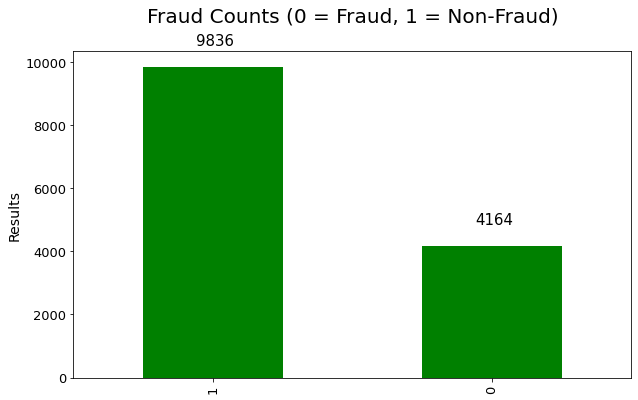

In [7]:
ax = dftrain['FRAUD_NONFRAUD'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='green')
ax.set_title('Fraud Counts (0 = Fraud, 1 = Non-Fraud)', size=20, pad=30)
ax.set_ylabel('Results', fontsize=14)
#display values
for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [8]:
# Identify the columns with missing values
dftrain.isnull().sum().sort_values(ascending = False)/len(dftrain)

PH_NUM_UPDT_TS             0.504357
PWD_UPDT_TS                0.223214
CARR_NAME                  0.193500
RGN_NAME                   0.193500
STATE_PRVNC_TXT            0.193500
DVC_TYPE_TXT               0.125786
AUTHC_SCNDRY_STAT_TXT      0.005286
CUST_STATE                 0.002571
FRAUD_NONFRAUD             0.000000
ALERT_TRGR_CD              0.000000
ACCT_PRE_TRAN_AVAIL_BAL    0.000000
CUST_AGE                   0.000000
OPEN_ACCT_CT               0.000000
WF_dvc_age                 0.000000
AUTHC_PRIM_TYPE_CD         0.000000
ACTVY_DT                   0.000000
CUST_ZIP                   0.000000
CUST_SINCE_DT              0.000000
TRAN_TS                    0.000000
TRAN_DT                    0.000000
ACTN_CD                    0.000000
ACTN_INTNL_TXT             0.000000
TRAN_TYPE_CD               0.000000
TRAN_AMT                   0.000000
dtype: float64

There are eight variables with missing values. Six of those variables have at least 10% of the total data missing. Since 'PH_NUM_UPDT_TS' is a date and more than 50% of the data is missing, this variable will be removed as it is unreliable. 'PWD_UPDT_TS' will be removed for the same reasons although it is missing roughly 22% of rows. For 'CARR_NAME','RGN_NAME','STATE_PRVNC_TXT', these null values will be separated into a category of 'unknown'. Lastly, we will remove the rest of the rows containing nulls since the total nulls left is very low and will not obscure the data further.

In [9]:
dftrain.drop(['PWD_UPDT_TS','PH_NUM_UPDT_TS'],inplace=True,axis=1)

dftrain["CARR_NAME"].fillna("Unknown", inplace = True)
dftrain["RGN_NAME"].fillna("Unknown", inplace = True)
dftrain["STATE_PRVNC_TXT"].fillna("Unknown", inplace = True)

dftrain = dftrain.dropna()

In [10]:
print(dftrain['ACTN_CD'].value_counts())
print(dftrain['ACTN_INTNL_TXT'].value_counts())
print(dftrain['TRAN_TYPE_CD'].value_counts())

SCHPMT    12141
Name: ACTN_CD, dtype: int64
P2P_COMMIT    12141
Name: ACTN_INTNL_TXT, dtype: int64
P2P    12141
Name: TRAN_TYPE_CD, dtype: int64


Since the three columns above only have one constant and distinct unit, they offer nothing in predicitve capability. They will be removed.

In [11]:
dftrain.drop(['ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD'],inplace=True,axis=1)


In [12]:
print(dftrain['TRAN_DT'].value_counts())
print(dftrain['ACTVY_DT'].value_counts())
#The columns are redundant. We can remove one.
dftrain.drop(['TRAN_DT'],inplace=True,axis=1)

2/28/2021              178
3/3/2021               115
3/5/2021               102
6/30/2021               98
3/1/2021                97
                      ... 
2021-03-10 00:00:00      1
2021-10-09 00:00:00      1
2021-11-22 00:00:00      1
2021-08-11 00:00:00      1
2021-11-07 00:00:00      1
Name: TRAN_DT, Length: 334, dtype: int64
2/28/2021              178
3/3/2021               115
3/5/2021               102
6/30/2021               98
3/1/2021                97
                      ... 
2021-03-10 00:00:00      1
2021-10-09 00:00:00      1
2021-11-22 00:00:00      1
2021-08-11 00:00:00      1
2021-11-07 00:00:00      1
Name: ACTVY_DT, Length: 334, dtype: int64


In [13]:
#Remove final columns with information that is redundant or not useful such as zipcode
dftrain.drop(['CUST_ZIP','CUST_SINCE_DT','TRAN_TS','ACTVY_DT'], inplace = True,axis=1)

Now we will look at feautures withhigh cardinality. These feautures give the model a difficult time to find patterns and analyze feautures outside the training set.

In [14]:
dftrain.dtypes

TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                   object
RGN_NAME                    object
STATE_PRVNC_TXT             object
ALERT_TRGR_CD               object
DVC_TYPE_TXT                object
AUTHC_PRIM_TYPE_CD          object
AUTHC_SCNDRY_STAT_TXT       object
CUST_STATE                  object
FRAUD_NONFRAUD               int64
dtype: object

In [15]:
# obj_df = dftrain.select_dtypes(include=['object']).copy()
# obj_df.head()

In [16]:
# obj_df["STATE_PRVNC_TXT"] = obj_df["STATE_PRVNC_TXT"].astype('category')
# obj_df["RGN_NAME"] = obj_df["RGN_NAME"].astype('category')
# obj_df["CARR_NAME"] = obj_df["CARR_NAME"].astype('category')
# obj_df["DVC_TYPE_TXT"] = obj_df["DVC_TYPE_TXT"].astype('category')
# obj_df["CUST_STATE"] = obj_df["CUST_STATE"].astype('category')
# obj_df["AUTHC_PRIM_TYPE_CD"] = obj_df["AUTHC_PRIM_TYPE_CD"].astype('category')
# obj_df["AUTHC_SCNDRY_STAT_TXT"] = obj_df["AUTHC_SCNDRY_STAT_TXT"].astype('category')
# obj_df["ALERT_TRGR_CD"] = obj_df["ALERT_TRGR_CD"].astype('category')
# obj_df.dtypes

In [17]:
# obj_df["ALERT_TRGR_CD"] = obj_df["ALERT_TRGR_CD"].cat.codes
# obj_df["STATE_PRVNC_TXT"] = obj_df["STATE_PRVNC_TXT"].cat.codes
# obj_df["RGN_NAME"] = obj_df["RGN_NAME"].cat.codes
# obj_df["CARR_NAME"] = obj_df["CARR_NAME"].cat.codes
# obj_df["DVC_TYPE_TXT"] = obj_df["DVC_TYPE_TXT"].cat.codes
# obj_df["CUST_STATE"] = obj_df["CUST_STATE"].cat.codes
# obj_df["AUTHC_PRIM_TYPE_CD"] = obj_df["AUTHC_PRIM_TYPE_CD"].cat.codes
# obj_df["AUTHC_SCNDRY_STAT_TXT"] = obj_df["AUTHC_SCNDRY_STAT_TXT"].cat.codes
# obj_df.head()

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dftrain["RGN_NAME"] = ord_enc.fit_transform(dftrain[["RGN_NAME"]])
dftrain["STATE_PRVNC_TXT"] = ord_enc.fit_transform(dftrain[["STATE_PRVNC_TXT"]])
dftrain["CARR_NAME"] = ord_enc.fit_transform(dftrain[["CARR_NAME"]])
dftrain["ALERT_TRGR_CD"] = ord_enc.fit_transform(dftrain[["ALERT_TRGR_CD"]])
dftrain["DVC_TYPE_TXT"] = ord_enc.fit_transform(dftrain[["DVC_TYPE_TXT"]])
dftrain["AUTHC_PRIM_TYPE_CD"] = ord_enc.fit_transform(dftrain[["AUTHC_PRIM_TYPE_CD"]])
dftrain["AUTHC_SCNDRY_STAT_TXT"] = ord_enc.fit_transform(dftrain[["AUTHC_SCNDRY_STAT_TXT"]])
dftrain["CUST_STATE"] = ord_enc.fit_transform(dftrain[["CUST_STATE"]])
dftrain.dtypes

TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                  float64
RGN_NAME                   float64
STATE_PRVNC_TXT            float64
ALERT_TRGR_CD              float64
DVC_TYPE_TXT               float64
AUTHC_PRIM_TYPE_CD         float64
AUTHC_SCNDRY_STAT_TXT      float64
CUST_STATE                 float64
FRAUD_NONFRAUD               int64
dtype: object

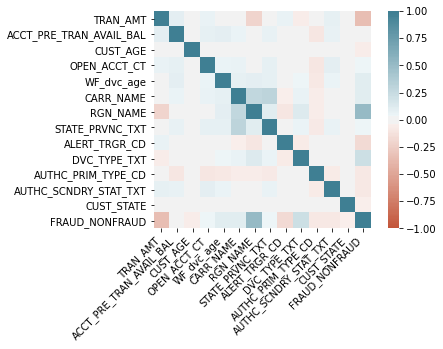

In [19]:
#Examine correlations between variables and response
corr = dftrain.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Testing Set

In [22]:
dftest.head(5)

,dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,...,CUST_ZIP,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT
0,1,54.25,0.0,23,4,634,9/18/2020 9:33:44,charter communications inc,southwest,california,...,55414,MN,7/8/2018 9:45:37,2011-02-19 00:00:00,1/8/2021 11:33:44,1/8/2021,SCHPMT,P2P_COMMIT,P2P,1/8/2021
1,2,110.30,0.0,56,3,1876,5/16/2021 17:2:31,comcast,mountain,colorado,...,77095,TX,NaN,2001-11-20 00:00:00,2/27/2021 7:2:31,2/27/2021,SCHPMT,P2P_COMMIT,P2P,2/27/2021
2,3,515.95,0.0,33,5,40,NaN,point broadband fiber holding llc,mid atlantic,virginia,...,94102,CA,8/28/2018 1:4:7,1999-10-17 00:00:00,4/22/2021 11:25:16,4/22/2021,SCHPMT,P2P_COMMIT,P2P,4/22/2021
3,4,42.78,0.0,60,3,367,2/18/2021 4:5:0,t-mobile usa inc.,southwest,california,...,93263,CA,7/3/2019 6:29:28,1998-07-03 00:00:00,6/17/2021 11:5:0,6/17/2021,SCHPMT,P2P_COMMIT,P2P,6/17/2021
4,5,0.01,0.0,61,12,518,2/18/2018 4:7:20,comcast cable communications llc,southwest,california,...,93313,CA,7/8/2020 11:45:37,2002-07-30 00:00:00,5/8/2021 10:0:51,5/8/2021,SCHPMT,P2P_COMMIT,P2P,5/8/2021


The test set contains 24 variables and 6,000 records. 

In [23]:
#Data exploration for numerical
dftest.nunique(axis=0)
dftest.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,266.761870,10707.551100,53.690333,6.644833,614.424833,74763.916167
std,1732.195139,300.251429,30657.706826,18.845750,9.974113,669.629549,24346.009155
min,1.000000,0.010000,0.000000,13.000000,0.000000,-88.000000,0.000000
25%,1500.750000,11.432500,0.000000,39.000000,3.000000,71.000000,75002.000000
50%,3000.500000,144.195000,2492.690000,59.000000,5.000000,373.500000,85086.000000
75%,4500.250000,488.910000,4883.027500,68.000000,7.000000,968.250000,92253.000000
max,6000.000000,2305.550000,323860.060000,105.000000,227.000000,2782.000000,99801.000000


In [26]:
# Identify the columns with missing values
dftest.isnull().sum().sort_values(ascending = False)/len(dftest)

PH_NUM_UPDT_TS             0.506000
PWD_UPDT_TS                0.219667
STATE_PRVNC_TXT            0.195833
CARR_NAME                  0.195833
RGN_NAME                   0.195833
DVC_TYPE_TXT               0.133833
AUTHC_SCNDRY_STAT_TXT      0.004333
CUST_STATE                 0.003667
TRAN_AMT                   0.000000
ACCT_PRE_TRAN_AVAIL_BAL    0.000000
CUST_AGE                   0.000000
OPEN_ACCT_CT               0.000000
WF_dvc_age                 0.000000
ACTVY_DT                   0.000000
ALERT_TRGR_CD              0.000000
TRAN_TYPE_CD               0.000000
AUTHC_PRIM_TYPE_CD         0.000000
CUST_ZIP                   0.000000
CUST_SINCE_DT              0.000000
TRAN_TS                    0.000000
TRAN_DT                    0.000000
ACTN_CD                    0.000000
ACTN_INTNL_TXT             0.000000
dataset_id                 0.000000
dtype: float64

In [27]:
dftest.drop(['PWD_UPDT_TS','PH_NUM_UPDT_TS'],inplace=True,axis=1)

dftest["CARR_NAME"].fillna("Unknown", inplace = True)
dftest["RGN_NAME"].fillna("Unknown", inplace = True)
dftest["STATE_PRVNC_TXT"].fillna("Unknown", inplace = True)

dftest = dftest.dropna()

In [28]:
print(dftest['ACTN_CD'].value_counts())
print(dftest['ACTN_INTNL_TXT'].value_counts())
print(dftest['TRAN_TYPE_CD'].value_counts())

SCHPMT    5151
Name: ACTN_CD, dtype: int64
P2P_COMMIT    5151
Name: ACTN_INTNL_TXT, dtype: int64
P2P    5151
Name: TRAN_TYPE_CD, dtype: int64


Since the three columns above only have one constant and distinct unit, they offer nothing in predicitve capability. They will be removed.

In [29]:
dftest.drop(['ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD'],inplace=True,axis=1)

/Users/colebailey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
print(dftest['TRAN_DT'].value_counts())
print(dftest['ACTVY_DT'].value_counts())
#The columns are redundant. We can remove one.
dftest.drop(['TRAN_DT'],inplace=True,axis=1)

2/28/2021              74
3/3/2021               50
6/3/2021               44
2/5/2021               40
2/4/2021               38
                       ..
2021-07-26 00:00:00     1
2021-08-27 00:00:00     1
2021-05-05 00:00:00     1
2021-11-22 00:00:00     1
2021-11-07 00:00:00     1
Name: TRAN_DT, Length: 276, dtype: int64
2/28/2021              74
3/3/2021               50
6/3/2021               44
2/5/2021               40
2/4/2021               38
                       ..
2021-07-26 00:00:00     1
2021-08-27 00:00:00     1
2021-05-05 00:00:00     1
2021-11-22 00:00:00     1
2021-11-07 00:00:00     1
Name: ACTVY_DT, Length: 276, dtype: int64


In [31]:
#Remove final columns with information that is redundant or not useful such as zipcode
dftest.drop(['CUST_ZIP','CUST_SINCE_DT','TRAN_TS','ACTVY_DT'], inplace = True,axis=1)

In [32]:
dftest.dtypes

dataset_id                   int64
TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                   object
RGN_NAME                    object
STATE_PRVNC_TXT             object
ALERT_TRGR_CD               object
DVC_TYPE_TXT                object
AUTHC_PRIM_TYPE_CD          object
AUTHC_SCNDRY_STAT_TXT       object
CUST_STATE                  object
dtype: object

In [33]:
ord_enc = OrdinalEncoder()
dftest["RGN_NAME"] = ord_enc.fit_transform(dftest[["RGN_NAME"]])
dftest["STATE_PRVNC_TXT"] = ord_enc.fit_transform(dftest[["STATE_PRVNC_TXT"]])
dftest["CARR_NAME"] = ord_enc.fit_transform(dftest[["CARR_NAME"]])
dftest["ALERT_TRGR_CD"] = ord_enc.fit_transform(dftest[["ALERT_TRGR_CD"]])
dftest["DVC_TYPE_TXT"] = ord_enc.fit_transform(dftest[["DVC_TYPE_TXT"]])
dftest["AUTHC_PRIM_TYPE_CD"] = ord_enc.fit_transform(dftest[["AUTHC_PRIM_TYPE_CD"]])
dftest["AUTHC_SCNDRY_STAT_TXT"] = ord_enc.fit_transform(dftest[["AUTHC_SCNDRY_STAT_TXT"]])
dftest["CUST_STATE"] = ord_enc.fit_transform(dftest[["CUST_STATE"]])
dftest.dtypes

<ipython-input-33-b9277a88fdfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest["RGN_NAME"] = ord_enc.fit_transform(dftest[["RGN_NAME"]])
<ipython-input-33-b9277a88fdfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest["STATE_PRVNC_TXT"] = ord_enc.fit_transform(dftest[["STATE_PRVNC_TXT"]])
<ipython-input-33-b9277a88fdfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

dataset_id                   int64
TRAN_AMT                   float64
ACCT_PRE_TRAN_AVAIL_BAL    float64
CUST_AGE                     int64
OPEN_ACCT_CT                 int64
WF_dvc_age                   int64
CARR_NAME                  float64
RGN_NAME                   float64
STATE_PRVNC_TXT            float64
ALERT_TRGR_CD              float64
DVC_TYPE_TXT               float64
AUTHC_PRIM_TYPE_CD         float64
AUTHC_SCNDRY_STAT_TXT      float64
CUST_STATE                 float64
dtype: object

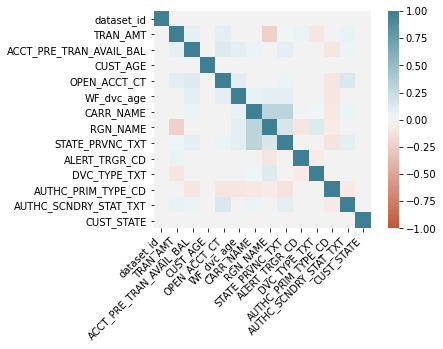

In [34]:
#Examine correlations between variables and response
corr = dftest.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);